In [1]:
from google.colab import drive

drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [2]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display




import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [3]:
!pip install deepface

     |████████████████████████████████| 61kB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 10.1MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=fe2ad63eee8b746b19dd42e5ba019d6f6e3ea98f94e502d9a28a738766c56c9d
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [4]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [5]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [6]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [7]:
def readEmbedings(listOfDesiredAugmentation, listOfDesiredModelNames, base_directory=""):
  listOfAugEmbedings=list()
  listOfAugLabels=list()
  
  for directory in listOfDesiredAugmentation:
    listOfAllModelEmbedings=list()

    for isFirst, modelName in enumerate(listOfDesiredModelNames):
      filename= base_directory+directory+"/"+ modelName+".txt"
      firstLineInDoc=True
      with open( filename, "r") as a_file:
        currentEmbedings= None
        currentlabels= None
        for outterIndex, line in enumerate(a_file):
          if (firstLineInDoc==True):
            firstline= line.split(",")
            numberOfEmbedings=int(firstline[0])
            embedingsSize    =int(firstline[1])
            currentEmbedings= np.empty((numberOfEmbedings,embedingsSize) )
            currentlabels= np.empty((numberOfEmbedings) )
            firstLineInDoc=False
            continue

          stripped_line = line.strip()
          line = stripped_line.split("[")[1]
          parts=line.split("]")
          numbers=parts[0]
          numbers=numbers.split(",")
          numbers = numbers[:-1]
          for index, number in enumerate(numbers):
              numbers[index]=float(number)
          currentEmbedings[outterIndex-1]=numbers
          if(isFirst==0):
            label=float(parts[1])
            currentlabels[outterIndex-1]=label
        if(isFirst==0):
          listOfAugLabels.append(currentlabels)
        listOfAllModelEmbedings.append(currentEmbedings)

    AugEmbedings= np.concatenate(listOfAllModelEmbedings, axis=1)
    listOfAugEmbedings.append(AugEmbedings)

  AugEmbedings= np.concatenate(listOfAugEmbedings, axis=0)
  AugLabels= np.concatenate(listOfAugLabels, axis=0)

  return AugEmbedings,AugLabels

In [8]:
# !ls

In [ ]:
# %cd /content/drive/MyDrive/AttracivenessRegression/FaceEncodings

/content/drive/MyDrive/AttracivenessRegression/FaceEncodings


In [ ]:
import itertools    
listOfAllModelNames=["facenet","vggface","openface", "deepface","deepID", "arcFace"] 
listOfAlCombinations= list()
for length in range(1, len(listOfAllModelNames)+1):
  temp= list(itertools.combinations(listOfAllModelNames, length))
  print(len(temp))
  listOfAlCombinations.extend(temp)


6
15
20
15
6
1


63

In [ ]:
len(listOfAlCombinations)

63

In [ ]:
listOfAlCombinations
len(listOfAlCombinations)

63

In [ ]:
len(doneAlready)

41

In [ ]:
listOfSomeCombinations= set(listOfAlCombinations) - set(doneAlready)
len(listOfSomeCombinations)

22

In [ ]:
!ls

Test  Training


In [ ]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
dic={}
listOfTrainingAugmentation=['HF', 'None', 'RO', 'HF-RC', 'None-RC', 'None-TR', 'HF-TR']
listOfTestAugmentation=['None']
numberOfRepeated=5
for combination in listOfSomeCombinations:
  training_embedings, training_labels= readEmbedings(listOfDesiredAugmentation=listOfTrainingAugmentation,
                                 listOfDesiredModelNames=combination,base_directory="Training/")
  testing_embedings, testing_labels= readEmbedings(listOfDesiredAugmentation=listOfTestAugmentation,
                                 listOfDesiredModelNames=combination,base_directory="Test/")
  normalizer = preprocessing.Normalization(axis=-1)
  normalizer.adapt(training_embedings)

  dic[combination]={"ModelName": combination , "ValLosses": list()}
  
  for i in range(numberOfRepeated):
    dropout_posibility=0.06
    L2_lambda=0.0004
    init_learning_rate=0.001
    newModel = tf.keras.models.Sequential([                 
        # pre_trained_model, 
        # tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.Input(shape=(training_embedings[0].shape[0],)),
        normalizer,
        tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
        tf.keras.layers.Dropout(dropout_posibility),
        tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
        tf.keras.layers.Dropout(dropout_posibility),
        tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
        tf.keras.layers.Dropout(dropout_posibility),
        tf.keras.layers.Dense(1,kernel_initializer=Heinitializer),
        ]) 


    learning_rate=0.001
    adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
    newModel.compile( optimizer=adamOptimizerWithCustomLearningRate,
    loss= tf.keras.losses.MeanAbsolutePercentageError())

    history= newModel.fit(
      training_embedings,
      training_labels,
      validation_data=(testing_embedings, testing_labels),
    # train_ds,
    # validation_data=val_ds,
    epochs=1
    )

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    numberEpochsPerIteration=50
    numberOfIterations=4
    for i in range(1, numberOfIterations+1):
      learning_rate=init_learning_rate/(i*10)
      adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
      newModel.compile(
        optimizer=adamOptimizerWithCustomLearningRate,
        # loss=tf.keras.losses.MeanAbsoluteError())
      loss= tf.keras.losses.MeanAbsolutePercentageError())


        # loss=tf.keras.losses.MeanSquaredError())
      history= newModel.fit(
        training_embedings,
        training_labels,
        validation_data=(testing_embedings, testing_labels),
      # train_ds,
      # validation_data=val_ds,
      epochs=numberEpochsPerIteration
      )
      loss += history.history['loss']
      val_loss += history.history['val_loss']

    dic[combination]["ValLosses"].append(min(val_loss))
  print( str(dic[combination]["ModelName"]) + " bestvalloss "+ str(min( dic[combination]["ValLosses"])))






    

  



157/157 [==============================] - 1s 2ms/step - loss: 39.7719 - val_loss: 25.8082
Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 28.0755 - val_loss: 25.2041
Epoch 2/50
157/157 [==============================] - 0s 1ms/step - loss: 28.0806 - val_loss: 24.5084
Epoch 3/50
157/157 [==============================] - 0s 1ms/step - loss: 27.3231 - val_loss: 23.6416
Epoch 4/50
157/157 [==============================] - 0s 1ms/step - loss: 25.6935 - val_loss: 23.3117
Epoch 5/50
157/157 [==============================] - 0s 1ms/step - loss: 25.2438 - val_loss: 22.8541
Epoch 6/50
157/157 [==============================] - 0s 1ms/step - loss: 24.4823 - val_loss: 22.4892
Epoch 7/50
157/157 [==============================] - 0s 1ms/step - loss: 24.3341 - val_loss: 22.1118
Epoch 8/50
157/157 [==============================] - 0s 1ms/step - loss: 23.7493 - val_loss: 21.9773
Epoch 9/50
157/157 [==============================] - 0s 1ms/step - loss: 23.1405 - val_loss:

KeyboardInterrupt: ignored

In [ ]:
dic.keys()

dict_keys([('openface', 'deepface'), ('facenet', 'vggface', 'deepface', 'deepID'), ('facenet', 'vggface', 'deepface', 'deepID', 'arcFace'), ('facenet', 'vggface', 'openface', 'deepface'), ('openface', 'deepface', 'deepID'), ('vggface', 'openface', 'arcFace'), ('facenet', 'vggface', 'openface', 'deepface', 'arcFace'), ('openface', 'deepface', 'arcFace'), ('facenet', 'arcFace'), ('openface', 'deepface', 'deepID', 'arcFace'), ('facenet', 'vggface', 'openface', 'deepID', 'arcFace'), ('facenet', 'vggface', 'deepface'), ('vggface', 'deepface', 'deepID', 'arcFace'), ('deepface', 'arcFace')])

In [ ]:
# fullDic= dict()

In [ ]:
# Python code to merge dict using update() method
def Merge(dict1, dict2):
    print("Hi")
    return  {**dict1, **dict2}

In [ ]:
fullDic= Merge(fullDic,dic)

Hi


In [ ]:
%cd ..

/content/drive/MyDrive/AttracivenessRegression


In [ ]:
!ls

FaceEncodings  FaceRecognisionImages  fullDic.txt  Test  Training


In [ ]:
# ('facenet',):{'ModelName': ('facenet',), 'ValLosses': [17.784801483154297, 17.84476661682129, 19.509611129760742, 17.953367233276367, 17.68967628479004]}
dic=dict()
with open("fullDic.txt", 'r') as f: 
    for line_number, line in  enumerate(f):
      parts=line.split(":")
      name=parts[0]
      lista= parts[3].split("}")[0]
      # print("1 "+ lista)
      lista= lista.split("[")[1]
      # print("2 "+ lista)
      lista= lista.split("]")[0]
      # print("3 "+ lista)

      lista= lista.split(",")
      numbers=list()
      for i, strNumber in enumerate(lista):
        print(line_number, i,strNumber)
        numbers.append(float(strNumber))
      dic[name]=numbers


0 0 17.784801483154297
0 1  17.84476661682129
0 2  19.509611129760742
0 3  17.953367233276367
0 4  17.68967628479004
1 0 17.220624923706055
1 1  39.986351013183594
1 2  17.040260314941406
1 3  18.050291061401367
1 4  18.324792861938477
2 0 19.604345321655273
2 1  19.738405227661133
2 2  19.550737380981445
2 3  19.18060874938965
2 4  18.83814811706543
3 0 22.06441307067871
3 1  24.90096664428711
3 2  30.50788116455078
3 3  19.78093719482422
3 4  21.89668083190918
4 0 39.98918533325195
4 1  18.935495376586914
4 2  39.97893524169922
4 3  18.903831481933594
4 4  19.1740665435791
5 0 18.710786819458008
5 1  17.27591896057129
5 2  18.291828155517578
5 3  18.40117073059082
5 4  17.419044494628906
6 0 17.808855056762695
6 1  16.953943252563477
6 2  18.084924697875977
6 3  18.329753875732422
6 4  16.913318634033203
7 0 16.70099639892578
7 1  17.670406341552734
7 2  18.065282821655273
7 3  18.365083694458008
7 4  17.805845260620117
8 0 23.127981185913086
8 1  27.650358200073242
8 2  20.879381179

In [ ]:
for key, value in dic.items():
  dic[key]=min(dic[key])
  print()

In [ ]:
for key, value in dic.items():
  print(dic[key], key)

17.68967628479004 ('facenet',)
17.040260314941406 ('vggface',)
18.83814811706543 ('openface',)
19.78093719482422 ('deepface',)
18.903831481933594 ('deepID',)
17.27591896057129 ('arcFace',)
16.913318634033203 ('facenet', 'vggface')
16.70099639892578 ('facenet', 'openface')
20.58898162841797 ('facenet', 'deepface', 'deepID')
16.611736297607422 ('facenet', 'vggface', 'deepID', 'arcFace')
22.204511642456055 ('facenet', 'openface', 'deepface', 'arcFace')
17.40798568725586 ('facenet', 'openface', 'deepID')
16.76219940185547 ('facenet', 'openface', 'arcFace')
16.51791000366211 ('facenet', 'deepID', 'arcFace')
17.014022827148438 ('facenet', 'openface', 'deepID', 'arcFace')
16.751989364624023 ('vggface', 'arcFace')
20.123844146728516 ('vggface', 'deepface')
17.13142967224121 ('facenet', 'vggface', 'openface', 'deepID')
19.024038314819336 ('vggface', 'openface', 'deepface', 'arcFace')
24.492963790893555 ('vggface', 'openface', 'deepface', 'deepID')
17.006996154785156 ('vggface', 'deepID', 'arcFa

In [ ]:
doneAlready=list(fullDic.keys())
doneAlready

[('facenet',),
 ('vggface',),
 ('openface',),
 ('deepface',),
 ('deepID',),
 ('arcFace',),
 ('facenet', 'vggface'),
 ('facenet', 'openface'),
 ('facenet', 'deepface'),
 ('facenet', 'deepface', 'deepID'),
 ('facenet', 'vggface', 'deepID', 'arcFace'),
 ('facenet', 'openface', 'deepface', 'arcFace'),
 ('facenet', 'openface', 'deepID'),
 ('facenet', 'openface', 'arcFace'),
 ('facenet', 'deepID', 'arcFace'),
 ('vggface', 'openface', 'deepface', 'deepID', 'arcFace'),
 ('facenet', 'openface', 'deepID', 'arcFace'),
 ('vggface', 'arcFace'),
 ('vggface', 'deepface'),
 ('facenet', 'vggface', 'openface', 'deepID'),
 ('vggface', 'openface', 'deepface', 'arcFace'),
 ('vggface', 'openface', 'deepface', 'deepID'),
 ('vggface', 'deepID', 'arcFace'),
 ('facenet', 'vggface', 'arcFace'),
 ('deepID', 'arcFace'),
 ('vggface', 'deepID'),
 ('vggface', 'deepface', 'arcFace'),
 ('openface', 'deepface'),
 ('facenet', 'vggface', 'deepface', 'deepID'),
 ('facenet', 'vggface', 'deepface', 'deepID', 'arcFace'),
 ('f

In [9]:
import time
from os import path
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace, DeepID, DlibWrapper, ArcFace, Boosting
from deepface.commons import functions, realtime, distance as dst
from keras.preprocessing import image as image_keras_preprocessing

#################

def postProcesssing(img, grayscale=False,target_size=(160,160)):
  #post-processing
  if grayscale == True:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, target_size)
  #TODO: resize causes transformation on base image, you should add black pixels to rezie it to target_size

  img_pixels = image_keras_preprocessing.img_to_array(img)
  img_pixels = np.expand_dims(img_pixels, axis = 0)
  img_pixels /= 255 #normalize input in [0, 1]
  return img_pixels


def getFaceImages(images, listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  #detect face in all images
  FRimages=list()
  for image in images: 
    managed_to_find_face=False
    for detector_backend in listWithFaceDetectors:
      try:
          img, region = functions.detect_face(img = image, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection, align = align)
          #--------------------------
          if img.shape[0] == 0 or img.shape[1] == 0:
            if enforce_detection == True:
              raise ValueError("Detected face shape is ", img.shape,". Consider to set enforce_detection argument to False.")
            else: #restore base image
              img = base_img.copy()
          #--------------------------

        #   img = functions.preprocess_face(img = image
        # , target_size=(input_shape_y, input_shape_x)
        # , enforce_detection = enforce_detection
        # , detector_backend = detector_backend
        # , align = align)
          managed_to_find_face=True
          FRimages.append(img)
          break;
      except ValueError: 
        continue
    if(managed_to_find_face==False):
      print("I COUNT NOT FIND THE FACE!!!!!")
      plt.imshow(image)
  return FRimages

def getSizeOfEmbedings(tempImage,model_list):
  sizeOfFinalinput=0;
  tempImage=FRimages[0]
  for model in model_list:
    input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
    img= postProcesssing(tempImage, grayscale=False,target_size=(input_shape_y, input_shape_x))
    curentEmbedings = model.predict(img)[0].tolist()
    sizeOfFinalinput= sizeOfFinalinput+ len(curentEmbedings)
  return sizeOfFinalinput

def getEmbedings(FRimages,sizeOfFinalInput):
  inputSize=(len(FRimages), sizeOfFinalInput)
  embedings=np.empty(inputSize)
  for index, image in enumerate(FRimages):
    image_embedgins= list()
    for model in model_list:
      try:
        input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
        img= postProcesssing(image, grayscale=False,target_size=(input_shape_y, input_shape_x))
        curentEmbedings = model.predict(img)[0].tolist()
        image_embedgins.extend(curentEmbedings)
      except:
        print("i couldnt get embedings")
        plt.imshow(image)
    npEmbedings=np.asarray(image_embedgins)
    print(npEmbedings.shape)
    embedings[index]=npEmbedings
  return embedings


def myRepresent(images,model_list , listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  """
  This function represents facial images as vectors.
  Parameters:
    img_path: exact image path, numpy array or based64 encoded images could be passed.
    model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
    model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
      model = DeepFace.build_model('VGG-Face')
    enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have this exception. This might be convenient for low resolution images.
    detector_backend (string): set face detector backend as retinaface, mtcnn, opencv, ssd or dlib
  Returns:
    Represent function returns a multidimensional vector. The number of dimensions is changing based on the reference model. E.g. FaceNet returns 128 dimensional vector; VGG-Face returns 2622 dimensional vector.
  """

  #detect face in all images
  FRimages=getFaceImages(images=images, listWithFaceDetectors=listWithFaceDetectors, grayscale=grayscale, enforce_detection = enforce_detection, align = align)


  tempImage=FRimages[0]
  sizeOfFinalinput=getSizeOfEmbedings(tempImage,model_list)
  print("sizeOfFinalinput "+str(sizeOfFinalinput) )

  embedings=getEmbedings(FRimages,sizeOfFinalInput=sizeOfFinalinput)
  return embedings


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [10]:
from matplotlib.pyplot import *

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0,2])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  draw()
  show()

In [ ]:
# numberEpochsPerIteration=30
# numberOfIterations=8
# for i in range(numberOfIterations+1, 2*numberOfIterations+1):
#   learning_rate=init_learning_rate/(i*10)
#   adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
#   newModel.compile(
#     optimizer=adamOptimizerWithCustomLearningRate,
#     # loss=tf.keras.losses.MeanAbsoluteError())
#   loss= tf.keras.losses.MeanAbsolutePercentageError())


#     # loss=tf.keras.losses.MeanSquaredError())
  
#   history= newModel.fit(
#     training_embedings,
#     training_labels,
#     validation_data=(test_embedings, test_labels),
#   # train_ds,
#   # validation_data=val_ds,
#   epochs=numberEpochsPerIteration
#   )
#   plot_loss(history)

In [ ]:
from kerastuner import HyperModel

class CNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
      hyperparameters={ 
      "rowShape":160,
    "columnShape":160,

  #   "rotation_range":hp.Int(
  #     'rotation_range',
  #     min_value=0,
  #     max_value=15,
  #     default=5
  # ),
  #   "width_shift_range":hp.Float(
  #     'width_shift_range',
  #     min_value=0.00000000001,
  #     max_value=0.2,
  #     default=0.05
  # ),
  #   "height_shift_range":hp.Float(
  #     'height_shift_range',
  #     min_value=0.00000000001,
  #     max_value=0.2,
  #     default=0.05
  # ),
  #   "shear_range":hp.Float(
  #     'shear_range',
  #     min_value=0.000000000000001,
  #     max_value=0.2,
  #     default=0.05,
  #     sampling='LOG',
  # ),
  #   "zoom_range":hp.Float(
  #     'zoom_range',
  #     min_value=0.000000000001,
  #     max_value=0.35,
  #     default=0.10,
  # ),
  #   "horizontal_flip":hp.Choice(
  #     'horizontal_flip',
  #     values=[True, False],
  #     default=True
  # ),
    "fill_mode":'nearest',
    "batch_size":128,
    
    "verbose": 1,


    "L2_lambda":hp.Float(
      'L2_lambda',
      min_value=0.0001,
      max_value=0.01,
      # default=0.1,
      sampling='LOG',
  ),
    
    "learning_rate":hp.Float(
      'learning_rate',
      min_value=0.0001,
      max_value=0.1,
      # default=0.2,
      sampling='LOG',
  ),


    "dropout_posibility":hp.Float(
      'dropout_posibility',
      min_value=0.001,
      max_value=0.3,
      sampling='LOG',
      # default=0.01,
  ),

    "numberOfHiddenLayers":hp.Choice(
      name='numberOfHiddenLayers',
      values=[3,4],
      # default=128
  ),


  "numberOfNodesInFirstDenseLayer":hp.Choice(
      name='numberOfNodesInFirstDenseLayer',
      values=[256,128,64],
      # default=128
  ),

    "numberOfNodesInSecondDenseLayer":hp.Choice(
      name='numberOfNodesInSecondDenseLayer',
      values=[64,32,16],
      # default=16
  ),

      "numberOfNodesInThirdDenseLayer":hp.Choice(
      name='numberOfNodesInThirdDenseLayer',
      values=[32,16,8],
      # default=6
  ),


        "numberOfNodesInThirdDenseLayer":hp.Choice(
      name='numberOfNodesInThirdDenseLayer',
      values=[8,4],
      # default=6
  ),

}
      Heinitializer = tf.keras.initializers.HeNormal()
      adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=hyperparameters["learning_rate"])
      model = tf.keras.models.Sequential([                 
          pre_trained_model, 
          # tf.keras.layers.GlobalAveragePooling2D(),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInFirstDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInSecondDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["numberOfNodesInThirdDenseLayer"], activation='relu', kernel_regularizer=regularizers.l2(hyperparameters["L2_lambda"]),kernel_initializer=Heinitializer),
          tf.keras.layers.Dropout(hyperparameters["dropout_posibility"]),
          tf.keras.layers.Dense(hyperparameters["num_of_classes"], activation='softmax',kernel_initializer=Heinitializer)
      ]) 
      model.build(input_shape= pre_trained_model.input.shape)
      model.compile(loss = tf.losses.SparseCategoricalCrossentropy(), optimizer=adamOptimizerWithCustomLearningRate, metrics=['accuracy'])
      # model.summary()


      return model

hypermodel = CNNHyperModel(input_shape=(hyperparameters["rowShape"], hyperparameters["columnShape"]), num_classes=3)

In [ ]:
!rm -rf random_search/
!mkdir random_search

In [ ]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=1,
    directory='random_search',
    project_name='Temporary'
)
tuner.search_space_summary()

N_EPOCH_SEARCH = 10

In [ ]:
tuner.search(x_train, y_train, epochs=N_EPOCH_SEARCH, validation_split=0.2)

In [ ]:
modelOutput= newModel.predict(x_test_embedings, )
num_classes=3

In [ ]:
predictions=list()
for preidciton in modelOutput:
  predictions.append(np.argmax(preidciton))


In [ ]:
predictions=np.asarray(predictions)

In [ ]:
predictions.shape

In [ ]:
modelOutput

In [ ]:
predictions

In [ ]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions=predictions, num_classes=num_classes)
confusion

In [11]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	


In [12]:



def scaling(x, scale):
	return x * scale

def InceptionResNetV2():
	
	inputs = Input(shape=(160, 160, 3))
	x = Conv2D(32, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_1a_3x3') (inputs)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_1a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_1a_3x3_Activation')(x)
	x = Conv2D(32, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_2a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2a_3x3_Activation')(x)
	x = Conv2D(64, 3, strides=1, padding='same', use_bias=False, name= 'Conv2d_2b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2b_3x3_Activation')(x)
	x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
	x = Conv2D(80, 1, strides=1, padding='valid', use_bias=False, name= 'Conv2d_3b_1x1') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_3b_1x1_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_3b_1x1_Activation')(x)
	x = Conv2D(192, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_4a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4a_3x3_Activation')(x)
	x = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_4b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4b_3x3_Activation')(x)
	
	# 5x Block35 (Inception-ResNet-A block):
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_1_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_1_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_2_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_2_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_3_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_3_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_4_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_4_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_5_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_5_Activation')(x)

	# Mixed 6a (Reduction-A block):
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_0_Conv2d_1a_3x3') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_6a_Branch_2_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_pool]
	x = Concatenate(axis=3, name='Mixed_6a')(branches)

	# 10x Block17 (Inception-ResNet-B block):
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_1_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_1_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_2_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_2_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_3_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_3_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_4_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_4_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_5_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_5_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_6_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_6_Activation')(x)	
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_7_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_7_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_7_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_7_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_8_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_8_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_8_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_8_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_9_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_9_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_9_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_9_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_10_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_10_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_10_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_10_Activation')(x)

	# Mixed 7a (Reduction-B block): 8 x 8 x 2080	
	branch_0 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_0a_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation')(branch_0)
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_1a_3x3') (branch_0)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_2 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_1a_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation')(branch_2)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_7a_Branch_3_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_2, branch_pool]
	x = Concatenate(axis=3, name='Mixed_7a')(branches)

	# 5x Block8 (Inception-ResNet-C block):
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_1_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_1_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_2_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_2_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_3_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_3_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_4_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_4_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_5_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_5_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_6_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 1})(up)
	x = add([x, up])
	
	# Classification block
	x = GlobalAveragePooling2D(name='AvgPool')(x)
	x = Dropout(1.0 - 0.8, name='Dropout')(x)
	# Bottleneck
	x = Dense(128, use_bias=False, name='Bottleneck')(x)
	x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False, name='Bottleneck_BatchNorm')(x)

	# Create model
	model = Model(inputs, x, name='inception_resnet_v1')

	return model




#---------------------------------------

def vggbaseModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model



#---------------------------------------

def openFaceModel():
  myInput = Input(shape=(96, 96, 3))

  x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
  x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
  x = Conv2D(64, (1, 1), name='conv2')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = Conv2D(192, (3, 3), name='conv3')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
  x = Activation('relu')(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x) #x is equal added
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)

  # Inception3a
  inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
  inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
  inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

  inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
  inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
  inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

  inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
  inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
  inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
  inception_3a_pool = Activation('relu')(inception_3a_pool)
  inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

  inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
  inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
  inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

  inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

  # Inception3b
  inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
  inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
  inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

  inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
  inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
  inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

  inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
  inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
  inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
  inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
  inception_3b_pool = Activation('relu')(inception_3b_pool)
  inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

  inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
  inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
  inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

  inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

  # Inception3c
  inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
  inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
  inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

  inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
  inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
  inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)

  inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
  inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

  inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

  #inception 4a
  inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
  inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
  inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

  inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
  inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
  inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

  inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
  inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)

  inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
  inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
  inception_4a_pool = Activation('relu')(inception_4a_pool)
  inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)

  inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
  inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
  inception_4a_1x1 = Activation('relu')(inception_4a_1x1)

  inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

  #inception4e
  inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
  inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
  inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

  inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
  inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
  inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)

  inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
  inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

  inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

  #inception5a
  inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
  inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
  inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

  inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
  inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)

  inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
  inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
  inception_5a_pool = Activation('relu')(inception_5a_pool)
  inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)

  inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
  inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
  inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

  inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

  #inception_5b
  inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
  inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
  inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)

  inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)

  inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
  inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
  inception_5b_pool = Activation('relu')(inception_5b_pool)

  inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

  inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
  inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
  inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

  inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

  av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
  reshape_layer = Flatten()(av_pool)
  dense_layer = Dense(128, name='dense_layer')(reshape_layer)
  norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

  # Final Model
  model = Model(inputs=[myInput], outputs=norm_layer)
  return model


def deepFaceModel():
  base_model = Sequential()
  base_model.add(Convolution2D(32, (11, 11), activation='relu', name='C1', input_shape=(152, 152, 3)))
  base_model.add(MaxPooling2D(pool_size=3, strides=2, padding='same', name='M2'))
  base_model.add(Convolution2D(16, (9, 9), activation='relu', name='C3'))
  base_model.add(LocallyConnected2D(16, (9, 9), activation='relu', name='L4'))
  base_model.add(LocallyConnected2D(16, (7, 7), strides=2, activation='relu', name='L5') )
  base_model.add(LocallyConnected2D(16, (5, 5), activation='relu', name='L6'))
  base_model.add(Flatten(name='F0'))
  base_model.add(Dense(4096, activation='relu', name='F7'))
  base_model.add(Dropout(rate=0.5, name='D0'))
  base_model.add(Dense(8631, activation='softmax', name='F8'))
  return base_model
	
	#---------------------------------
def deepIDModel():
  myInput = Input(shape=(55, 47, 3))

  x = Conv2D(20, (4, 4), name='Conv1', activation='relu', input_shape=(55, 47, 3))(myInput)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool1')(x)
  x = Dropout(rate=0.99, name='D1')(x)

  x = Conv2D(40, (3, 3), name='Conv2', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool2')(x)
  x = Dropout(rate=0.99, name='D2')(x)

  x = Conv2D(60, (3, 3), name='Conv3', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool3')(x)
  x = Dropout(rate=0.99, name='D3')(x)

  x1 = Flatten()(x)
  fc11 = Dense(160, name = 'fc11')(x1)

  x2 = Conv2D(80, (2, 2), name='Conv4', activation='relu')(x)
  x2 = Flatten()(x2)
  fc12 = Dense(160, name = 'fc12')(x2)

  y = Add()([fc11, fc12])
  y = Activation('relu', name = 'deepid')(y)

  model = Model(inputs=[myInput], outputs=y)
  return model

	
def ResNet34():

  img_input = tensorflow.keras.layers.Input(shape=(112, 112, 3))

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
  x = tensorflow.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
  x = stack_fn(x)

  model = training.Model(img_input, x, name='ResNet34')

  return model



def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
  bn_axis = 3

  if conv_shortcut:
    shortcut = tensorflow.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
    shortcut = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
  else:
    shortcut = x

  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

  x = tensorflow.keras.layers.Add(name=name + '_add')([shortcut, x])
  return x

def stack1(x, filters, blocks, stride1=2, name=None):
  x = block1(x, filters, stride=stride1, name=name + '_block1')
  for i in range(2, blocks + 1):
    x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
  return x

def stack_fn(x):
  x = stack1(x, 64, 3, name='conv2')
  x = stack1(x, 128, 4, name='conv3')
  x = stack1(x, 256, 6, name='conv4')
  return stack1(x, 512, 3, name='conv5')

def arcFaceModel():
  base_model = ResNet34()
  inputs = base_model.inputs[0]
  arcface_model = base_model.outputs[0]
  arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
  arcface_model = keras.layers.Dropout(0.4)(arcface_model)
  arcface_model = keras.layers.Flatten()(arcface_model)
  arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
  embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
  model = keras.models.Model(inputs, embedding, name=base_model.name)
  return model





In [13]:

def putResizeLayerInModel(model, actualInputShape=(160, 160, 3)):
  input_size=functions.find_input_shape(model)

  toBeModel=tf.keras.Sequential()
  toBeModel.add(Input(shape=actualInputShape))
  toBeModel.add(tf.keras.layers.experimental.preprocessing.Resizing(height=input_size[0],
                                                                width=input_size[1]))
  toBeModel.add(model)
  return toBeModel

def loadAModel(basemodel,nameOfWheights):
  home = "/content/drive/MyDrive/Models_Herodotou/"
  model = basemodel
  output = home+nameOfWheights
  model.load_weights(output)
  return model


def loadFaceNetModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=InceptionResNetV2(),nameOfWheights='facenet_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadVGGFaceModel(useResizeLayerInModel=False):
  model = loadAModel(basemodel=vggbaseModel(),nameOfWheights='vgg_face_weights.h5')
  model= Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadOpenFaceModel(useResizeLayerInModel=False):
  model=loadAModel(basemodel=openFaceModel(),nameOfWheights='openface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadDeepFaceModel(useResizeLayerInModel=False):
  base_model=  loadAModel(basemodel=deepFaceModel(),nameOfWheights='VGGFace2_DeepFace_weights_val-0.9034.h5')
  base_model= Model(inputs=base_model.layers[0].input, outputs=base_model.layers[-3].output)
  if(useResizeLayerInModel==True):
    base_model=putResizeLayerInModel(base_model)
  return base_model

def loadDeepIDModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=deepIDModel(),nameOfWheights='deepid_keras_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

def loadArcFaceModel(useResizeLayerInModel=False):
  model= loadAModel(basemodel=arcFaceModel(),nameOfWheights='arcface_weights.h5')
  if(useResizeLayerInModel==True):
    model=putResizeLayerInModel(model)
  return model

In [14]:
!ls

drive  sample_data


In [15]:
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..
%cd ..

/
/
/
/
/
/


In [ ]:
ls

bin/      datalab/  home/   lib64/  opt/   run/   sys/                tools/
boot/     dev/      lib/    media/  proc/  sbin/  tensorflow-1.15.2/  usr/
content/  etc/      lib32/  mnt/    root/  srv/   tmp/                var/


In [ ]:
numberOftrainingPictures= !ls /content/drive/MyDrive/AttracivenessRegression/Training | wc -l
numberOfTestPictures= !ls /content/drive/MyDrive/AttracivenessRegression/Test | wc -l

numberOftrainingPictures= int(numberOftrainingPictures[0])
numberOfTestPictures= int(numberOfTestPictures[0])

In [ ]:
print(numberOftrainingPictures)
print(numberOfTestPictures)

8340
180


In [16]:
base_directory = r"/content/drive/MyDrive/AttracivenessRegression/"

def readData(numberOfPictures,dirName):
  sizeOfInput=(numberOfPictures,160,160,3)
  x= np.empty(shape=sizeOfInput,dtype=np.uint8)
  y= np.empty(shape=(numberOfPictures,))
  aug= list()

  directory=base_directory+ dirName+ "/"
  print(directory)
  for index, filename in enumerate(os.listdir(directory)):

    img= cv2.imread(directory+filename)
    try:
      img = img[..., ::-1]
      img=img.astype("uint8")
    except Exception as e: 
      print("FUUUUCK\n"+ filename )
      print(e)
      continue


    rest= filename.split("kostis_")[1]
    rest=rest.split("_")
    aug_type=rest[0]

    label=rest[1] 
    label= float(label.split(".jp")[0])

    x[index]=img
    y[index]=label
    aug.append(aug_type)
  
  return x,y,aug

In [17]:
import os

def findNumberOfItemsInDirectory(directoryPath):

  totalFiles = 0
  totalDir = 0

  for base, dirs, files in os.walk(directoryPath):
      print('Searching in : ',base)
      for Files in files:
          totalFiles += 1

  return totalFiles
  

In [18]:
def readDataFromSingleFolder(dirPath):
  numberOfPictures= findNumberOfItemsInDirectory(dirPath)
  sizeOfInput=(numberOfPictures,160,160,3)
  x= np.empty(shape=sizeOfInput,dtype=np.uint8)
  y= np.empty(shape=(numberOfPictures,))
  aug= list()

  directory=dirPath+ "/"
  print(directory)
  for index, filename in enumerate(os.listdir(directory)):

    img= cv2.imread(directory+filename)
    try:
      img = img[..., ::-1]
      img=img.astype("uint8")
    except Exception as e: 
      print("FUUUUCK\n"+ filename )
      print(e)
      continue


    rest= filename.split("kostis_")[1]
    rest=rest.split("_")
    aug_type=rest[0]

    label=rest[1] 
    label= float(label.split(".jp")[0])

    x[index]=img
    y[index]=label
    aug.append(aug_type)
  
  return x,y,aug

In [20]:
base_directory = r"/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/"
def readFRImages(listOfDesiredAugmentation, directory_plug_in=""):
  totalX=[]
  totalY=[]

  for directory in listOfDesiredAugmentation:
    x,y,aug= readDataFromSingleFolder(base_directory+directory_plug_in+ directory)
    totalX.append(x)
    totalY.append(y)

  images= np.concatenate(totalX, axis=0)
  labels= np.concatenate(totalY, axis=0)

  return images,labels

In [24]:
x_train_all, y_train_all =readFRImages(listOfDesiredAugmentation=listOfDesiredAugmentation
                                             ,directory_plug_in="Training/")

Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/RO
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/RO/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/HF-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Training/None-TR
/cont

In [25]:
x_test, y_test=readFRImages(listOfDesiredAugmentation=listOfDesiredAugmentation
                                             ,directory_plug_in="Test/")

Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/RO
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/RO/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/HF-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-RC
/content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-RC/
Searching in :  /content/drive/MyDrive/TrustworthyRegression/FaceRecognisionImages/Test/None-TR
/content/drive/MyDrive/TrustworthyRegression/Face

In [26]:
from deepface.commons import functions

In [ ]:
# Classifier = tf.keras.models.Sequential([                 
#     # pre_trained_model, 
#     # tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.Input(shape=(training_embedings[0].shape[0],)),
#     normalizer,
#     tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
#     tf.keras.layers.Dropout(dropout_posibility),
#     tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
#     tf.keras.layers.Dropout(dropout_posibility),
#     tf.keras.layers.Dense(3, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
#     tf.keras.layers.Dropout(dropout_posibility),
#     tf.keras.layers.Dense(1,kernel_initializer=Heinitializer),
#     ]) 

In [27]:
facenet= loadFaceNetModel(useResizeLayerInModel=True)
vggface= loadVGGFaceModel(useResizeLayerInModel=True)   #Use this one
openface=loadOpenFaceModel(useResizeLayerInModel=True)
deepface=loadDeepFaceModel(useResizeLayerInModel=True)
deepID=loadDeepIDModel(useResizeLayerInModel=True)      #Use this one
arcFace=loadArcFaceModel(useResizeLayerInModel=True)



In [28]:
facenet.trainable=False;
vggface.trainable=False;
openface.trainable=False;
deepface.trainable=False;
deepID.trainable=False;
arcFace.trainable=False;


# **HERE!**

In [23]:
# listOfDesiredAugmentation=['HF', 'None', 'RO', 'RO-RC', 'HF-RC', 'RO-TR', 'None-RC', 'None-TR', 'HF-TR']
# listOfDesiredAugmentation=['HF', 'None', "RO"]  # Best results so far
listOfDesiredAugmentation=['HF', 'None', 'RO', 'HF-RC', 'None-RC', 'None-TR', 'HF-TR']

# listOfDesiredModelNames=["facenet","vggface","openface", "deepface","deepID", "arcFace"]    #all 
# listOfDesiredModelNames=["facenet","vggface","openface","deepID", "deepface"]                # best performance 
listOfDesiredModelNames=[ "facenet"]                # try minimal stuff  

In [29]:
%cd /content/drive/MyDrive/TrustworthyRegression/FaceEncodings/Training

/content/drive/MyDrive/TrustworthyRegression/FaceEncodings/Training


In [30]:
%cd .. 
%cd Training

/content/drive/MyDrive/TrustworthyRegression/FaceEncodings
/content/drive/MyDrive/TrustworthyRegression/FaceEncodings/Training


In [31]:
training_embedings, training_labels= readEmbedings(listOfDesiredAugmentation=listOfDesiredAugmentation,
                                 listOfDesiredModelNames=listOfDesiredModelNames)

In [32]:
training_embedings[0].shape[0]

128

In [33]:
%cd ..
%cd Test

/content/drive/My Drive/TrustworthyRegression/FaceEncodings
/content/drive/My Drive/TrustworthyRegression/FaceEncodings/Test


In [34]:
# listOfDesiredAugmentation=['HF', 'None', 'RO', 'RO-RC', 'HF-RC', 'RO-TR', 'None-RC', 'None-TR', 'HF-TR']
listOfDesiredAugmentation=['None',]

In [35]:
test_embedings, test_labels= readEmbedings(listOfDesiredAugmentation=listOfDesiredAugmentation,
                                 listOfDesiredModelNames=listOfDesiredModelNames)

In [36]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
from tensorflow.keras.layers.experimental import preprocessing



In [37]:
from tensorflow.keras.layers.experimental import preprocessing
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(training_embedings)
# print(normalizer.mean.numpy())


dropout_posibility=0.06
L2_lambda=0.0004
init_learning_rate=0.001
newModel = tf.keras.models.Sequential([                 
    # pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.Input(shape=(training_embedings[0].shape[0],)),
    normalizer,
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(1,kernel_initializer=Heinitializer),
    ]) 
newModel.summary()

stathera kato apo 17%




In [46]:
# dropout_posibility=0.05
# L2_lambda=0.0003

dropout_posibility=0.01
L2_lambda=0.00001

init_learning_rate=0.001
newModel = tf.keras.models.Sequential([                 
    # pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.Input(shape=(training_embedings[0].shape[0],)),
    normalizer,
    # tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    # tf.keras.layers.Dropout(dropout_posibility),
    # tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    # tf.keras.layers.Dropout(dropout_posibility),
    # tf.keras.layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    # tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(1,kernel_initializer=Heinitializer),
    ]) 
newModel.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 128)               257       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 386
Trainable params: 129
Non-trainable params: 257
_________________________________________________________________


Epoch 1/250
157/157 [==============================] - 1s 2ms/step - loss: 85.5880 - val_loss: 88.5135
Epoch 2/250
157/157 [==============================] - 0s 1ms/step - loss: 85.1009 - val_loss: 88.0411
Epoch 3/250
157/157 [==============================] - 0s 1ms/step - loss: 84.6162 - val_loss: 87.6157
Epoch 4/250
157/157 [==============================] - 0s 1ms/step - loss: 84.1386 - val_loss: 87.1554
Epoch 5/250
157/157 [==============================] - 0s 1ms/step - loss: 83.6569 - val_loss: 86.7377
Epoch 6/250
157/157 [==============================] - 0s 1ms/step - loss: 83.1803 - val_loss: 86.2918
Epoch 7/250
157/157 [==============================] - 0s 1ms/step - loss: 82.6977 - val_loss: 85.8974
Epoch 8/250
157/157 [==============================] - 0s 1ms/step - loss: 82.2171 - val_loss: 85.4488
Epoch 9/250
157/157 [==============================] - 0s 1ms/step - loss: 81.7375 - val_loss: 85.0124
Epoch 10/250
157/157 [==============================] - 0s 2ms/step - los

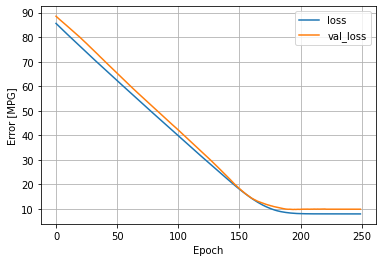

Epoch 1/250
157/157 [==============================] - 1s 2ms/step - loss: 7.9715 - val_loss: 9.8895
Epoch 2/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9691 - val_loss: 9.8934
Epoch 3/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9692 - val_loss: 9.9146
Epoch 4/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9700 - val_loss: 9.8935
Epoch 5/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9695 - val_loss: 9.8975
Epoch 6/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9683 - val_loss: 9.8804
Epoch 7/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9673 - val_loss: 9.8827
Epoch 8/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9678 - val_loss: 9.8749
Epoch 9/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9681 - val_loss: 9.8916
Epoch 10/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9681 - val_lo

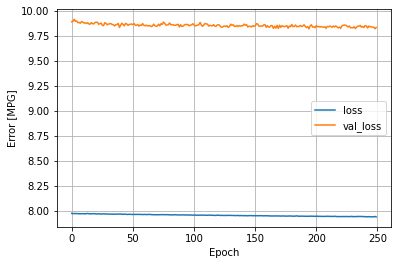

Epoch 1/250
157/157 [==============================] - 1s 2ms/step - loss: 7.9335 - val_loss: 9.8385
Epoch 2/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9330 - val_loss: 9.8399
Epoch 3/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9322 - val_loss: 9.8281
Epoch 4/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9330 - val_loss: 9.8431
Epoch 5/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9325 - val_loss: 9.8401
Epoch 6/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9331 - val_loss: 9.8416
Epoch 7/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9319 - val_loss: 9.8219
Epoch 8/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9322 - val_loss: 9.8252
Epoch 9/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9319 - val_loss: 9.8338
Epoch 10/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9319 - val_lo

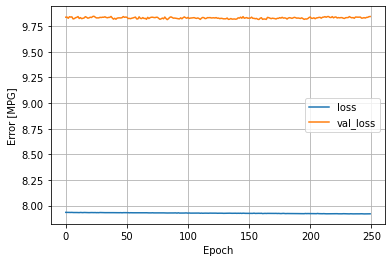

Epoch 1/250
157/157 [==============================] - 1s 2ms/step - loss: 7.9168 - val_loss: 9.8460
Epoch 2/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9162 - val_loss: 9.8408
Epoch 3/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9159 - val_loss: 9.8366
Epoch 4/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9153 - val_loss: 9.8444
Epoch 5/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9158 - val_loss: 9.8443
Epoch 6/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9159 - val_loss: 9.8369
Epoch 7/250
157/157 [==============================] - 0s 1ms/step - loss: 7.9153 - val_loss: 9.8379
Epoch 8/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9162 - val_loss: 9.8331
Epoch 9/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9162 - val_loss: 9.8334
Epoch 10/250
157/157 [==============================] - 0s 2ms/step - loss: 7.9170 - val_lo

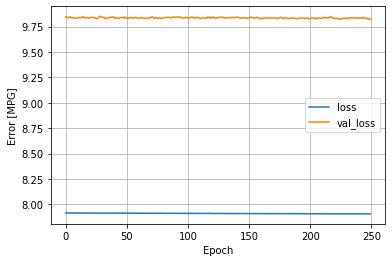

In [48]:
numberEpochsPerIteration=250
numberOfIterations=4
for i in range(1, numberOfIterations+1):
  learning_rate=init_learning_rate/(i*10)
  adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
  newModel.compile(
    optimizer=adamOptimizerWithCustomLearningRate,
    # loss=tf.keras.losses.MeanAbsoluteError())
  loss= tf.keras.losses.MeanAbsolutePercentageError())


    # loss=tf.keras.losses.MeanSquaredError())
  
  history= newModel.fit(
    training_embedings,
    training_labels,
    validation_data=(test_embedings, test_labels),
  # train_ds,
  # validation_data=val_ds,
  epochs=numberEpochsPerIteration
  )
  plot_loss(history)






In [ ]:
# model_list=[facenet, vggface, openface, deepface, deepID,arcFace ]

# listOfDesiredModelNames=["facenet", "openface", "deepID", "arcFace"]                # try minimal stuff  
model_list=[facenet, deepID ]

In [ ]:
fine_tune_at=5
for model in model_list:
  model=model.layers[1]
  for layer in model.layers[:fine_tune_at]:
    layer.trainable =  False
  for layer in model.layers[fine_tune_at:]:
    layer.trainable =  True 

In [ ]:
# tempImage=x_test[0]

In [ ]:
# inputs = Input(shape=(160, 160, 3))
# model1= vggface(inputs)
# model2= deepID(inputs)
# model3= openface(inputs)
# model4= deepface(inputs)
# model5= deepID(inputs)
# model6= arcFace(inputs)
# branches = [model1, model2,model3, model4,model5, model6]
# mixed = Concatenate(axis=1, name='models_Concatenate')(branches)
# pre_classifier= tf.keras.layers.Dense(newModel.input_shape[1])(mixed)
# classifier= newModel(pre_classifier)

# concatenatedPreTrainedModels = Model(inputs, classifier, name='concatenatedPreTrainedModels')

inputs = Input(shape=(160, 160, 3))
models=list()
for model in model_list:
  models.append(model(inputs))
branches = models
mixed = Concatenate(axis=1, name='models_Concatenate')(branches)
# pre_classifier= tf.keras.layers.Dense(newModel.input_shape[1])(mixed)
classifier= newModel(mixed)

concatenatedPreTrainedModels = Model(inputs, classifier, name='concatenatedPreTrainedModels')



In [ ]:
concatenatedPreTrainedModels.output.shape

TensorShape([None, 1])

In [ ]:
model=concatenatedPreTrainedModels

In [ ]:
learning_rate=0.000011
adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
  optimizer=adamOptimizerWithCustomLearningRate,
  # loss=tf.keras.losses.MeanAbsoluteError())
loss= tf.keras.losses.MeanAbsolutePercentageError())


  # loss=tf.keras.losses.MeanSquaredError())

history= model.fit(
    x_train_all,
    y_train_all,
  validation_data=(x_test, y_test),
epochs=2
)
plot_loss(history)


Epoch 1/2
 35/157 [=====>........................] - ETA: 4:02 - loss: 5173556736.0000

In [ ]:
# model..com

In [ ]:
# def getmixedModel():

#   return model;

In [ ]:
# mixedModel= getmixedModel()

IndexError: ignored